# Coding practice \#4: Due midnight, November 15

files needed = ('pwt91.xlsx')

Answer the questions below in a jupyter notebook. You can simply add cells to this notebook and enter your answers. When you are finished, upload the completed notebook to canvas. 

A reminder: My office hours are Tuesdays 2:30PM-3:30PM and Thursdays 9:45AM-10:45AM in Soc Sci 7444. You can also send me questions by email. 

*You should feel free to discuss the coding practice with your classmates, but the work you turn in should be your own.*

# Exercise 0: Ruhl, Kim
Replace 'Your name' above with your actual name. Enter it as: last name, first name.

## Exercise 1: Shaping data

We are working with the Penn World Tables today. The 'PWT' as they call it, is a panel data set of countries. The value here is that the variables are adjusted for purchasing power parity, making them comparable across countries. The data are [here](https://www.rug.nl/ggdc/productivity/pwt/). 

1. Load the data from 'pwt91.xlsx' into a DataFrame. Name the DataFrame 'pwt'.
2. Drop the variable 'country'.

In [1]:
import pandas as pd     #load the pandas package and call it pd
import matplotlib.pyplot as plt   # load the pyplot set of tools from the package matplotlib. Name it plt for short.


In [2]:
pwt = pd.read_excel('pwt91.xlsx', sheet_name = 'Data')
pwt.drop(['country'], axis=1, inplace=True)
pwt.sample(10)

,countrycode,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
1689,BRA,Brazilian Real,2007,1.998549e+06,1.989526e+06,191.026642,93.872772,1781.691284,2.341256,1.534701e+06,...,0.138483,-0.126875,1.115940e-07,0.705363,0.656589,0.758854,0.679292,0.665631,0.505729,0.965543
8337,NER,CFA Franc BCEAO,1991,6.650543e+03,6.648901e+03,8.272976,3.256364,NaN,1.062905,5.825289e+03,...,0.083537,-0.047128,-1.283592e-01,0.431445,0.345470,0.294739,0.551619,0.592148,0.403745,0.543303
54,ABW,Aruban Guilder,2004,4.201697e+03,3.727604e+03,0.098737,0.048289,NaN,NaN,2.726413e+03,...,0.618453,-0.671059,-2.507139e-06,0.620703,0.395913,0.589059,0.567820,0.551389,0.379133,0.520013
11884,VCT,East Caribbean Dollar,2002,8.209080e+02,6.629452e+02,0.108146,0.040000,NaN,NaN,7.332388e+02,...,0.506064,-0.803238,-1.230653e-16,0.600654,0.957867,0.362694,0.540686,0.410400,1.838319,NaN
5007,HRV,Croatian Kuna,1993,3.743958e+04,3.726831e+04,4.697535,1.702493,NaN,2.750473,3.116859e+04,...,0.221099,-0.284588,6.761941e-02,0.396696,0.398427,0.266769,0.492593,0.457454,0.447980,NaN
5949,KAZ,Tenge,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2991,CYM,Cayman Islands Dollar,2017,3.449647e+03,1.834733e+03,0.061559,NaN,NaN,NaN,2.538220e+03,...,1.485180,-2.107544,-1.085217e-02,1.308336,1.045408,1.005977,0.806746,0.562419,0.750641,1.146317
6508,LBN,Lebanese Pound,1998,1.996961e+04,1.314590e+04,3.113951,0.876000,NaN,NaN,1.997759e+04,...,0.093678,-1.044061,9.054314e-02,0.916725,1.011681,0.594364,0.528703,0.506277,1.186824,1.829399
9387,QAT,Qatari Rial,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9942,SLE,Leone,1964,2.759324e+03,2.438284e+03,2.454658,NaN,NaN,1.071347,2.342907e+03,...,0.377317,-0.434706,6.437615e-03,0.144862,0.731972,0.057214,0.133555,0.100082,1.062242,NaN


3. Using whatever methods you prefer (stack, unstack, melt, pivot, transpose, set_index, etc.) shape the data so that the **row index** is the date and the **column index** is a multiIndex with the variable name at the top level, the country code at the second level and the currency unit at the third level.

In [3]:
# I am going to set up the index and then unstack. 
pwt = pwt.set_index(['countrycode', 'currency_unit', 'year'])
pwt.head(2)

rgdpe  rgdpo  pop  emp  avh  hc  ccon  cda  \
countrycode currency_unit  year                                               
ABW         Aruban Guilder 1950    NaN    NaN  NaN  NaN  NaN NaN   NaN  NaN   
                           1951    NaN    NaN  NaN  NaN  NaN NaN   NaN  NaN   

                                 cgdpe  cgdpo  ...  csh_x  csh_m  csh_r  pl_c  \
countrycode currency_unit  year                ...                              
ABW         Aruban Guilder 1950    NaN    NaN  ...    NaN    NaN    NaN   NaN   
                           1951    NaN    NaN  ...    NaN    NaN    NaN   NaN   

                                 pl_i  pl_g  pl_x  pl_m  pl_n  pl_k  
countrycode currency_unit  year                                      
ABW         Aruban Guilder 1950   NaN   NaN   NaN   NaN   NaN   NaN  
                           1951   NaN   NaN   NaN   NaN   NaN   NaN  

[2 rows x 48 columns]

In [4]:
# Now I just unstack the outer two levels to columns
pwt = pwt.unstack(level=[0,1]) 
pwt.head(2)

rgdpe                                              \
countrycode              ABW    AGO                   AIA ALB        ARE   
currency_unit Aruban Guilder Kwanza East Caribbean Dollar Lek UAE Dirham   
year                                                                       
1950                     NaN    NaN                   NaN NaN        NaN   
1951                     NaN    NaN                   NaN NaN        NaN   

                                                                  \
countrycode              ARG           ARM                   ATG   
currency_unit Argentine Peso Armenian Dram East Caribbean Dollar   
year                                                               
1950            45306.718750           NaN                   NaN   
1951            47450.910156           NaN                   NaN   

                                               ...      pl_k                 \
countrycode                 AUS           AUT  ...       USA            UZB   
currency_unit Australian Dollar          Euro  ... US Dollar Uzbekistan Sum   
year                                           ...                            
1950              113607.179688  37076.671875  ...       NaN            NaN   
1951              106139.820312  38447.585938  ...       NaN            NaN   

                                                                               \
countrycode                     VCT            VEN       VGB  VNM         YEM   
currency_unit East Caribbean Dollar Bolivar Fuerte US Dollar Dong Yemeni Rial   
year                                                                            
1950                            NaN            NaN       NaN  NaN         NaN   
1951                            NaN            NaN       NaN  NaN         NaN   

                                     
countrycode    ZAF    ZMB       ZWE  
currency_unit Rand Kwacha US Dollar  
year                                 
1950           NaN    NaN       NaN  
1951           NaN    NaN       NaN  

[2 rows x 8736 columns]

4. Create a new DataFrame named 'gdp_cap' that contains real GDP per capita (`rgdpe`/`pop`) for the 182 countries in the data set. You should **not** use a loop to do this. \[You might try `xs()`...or something else!\]

In [5]:
gdp_cap=pwt.xs('rgdpe',  axis=1, level=0) / pwt.xs('pop',  axis=1, level=0)
gdp_cap.head()

countrycode,ABW,AGO,AIA,ALB,ARE,ARG,ARM,ATG,AUS,AUT,...,USA,UZB,VCT,VEN,VGB,VNM,YEM,ZAF,ZMB,ZWE
currency_unit,Aruban Guilder,Kwanza,East Caribbean Dollar,Lek,UAE Dirham,Argentine Peso,Armenian Dram,East Caribbean Dollar,Australian Dollar,Euro,...,US Dollar,Uzbekistan Sum,East Caribbean Dollar,Bolivar Fuerte,US Dollar,Dong,Yemeni Rial,Rand,Kwacha,US Dollar
year,,,,,,,,,,,,,,,,,,,,,
1950,NaN,NaN,NaN,NaN,NaN,2640.555471,NaN,NaN,13546.154372,5311.272260,...,14572.366692,NaN,NaN,5868.738997,NaN,NaN,NaN,5230.133849,NaN,NaN
1951,NaN,NaN,NaN,NaN,NaN,2707.582269,NaN,NaN,12294.023538,5507.378382,...,15334.534889,NaN,NaN,6208.656225,NaN,NaN,NaN,5198.166165,NaN,NaN
1952,NaN,NaN,NaN,NaN,NaN,2400.377470,NaN,NaN,11692.108933,5770.761180,...,15632.087610,NaN,NaN,6737.094525,NaN,NaN,NaN,4703.334633,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN,2446.620817,NaN,NaN,12763.606152,6033.412246,...,16134.970491,NaN,NaN,6800.193076,NaN,NaN,NaN,5141.210242,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN,2510.297093,NaN,NaN,13319.611254,6438.922587,...,15764.692342,NaN,NaN,7272.901967,NaN,NaN,NaN,5441.221962,NaN,1691.283373


5. Create another new DataFrame named 'con_share' that contains the share of GDP expenditure that goes to consumption (`ccon`/`cgdpe`) for the 182 countries in the data set. You should **not** use a loop to do this. 

In [6]:
con_share = pwt.xs('ccon',  axis=1, level=0) / pwt.xs('cgdpe',  axis=1, level=0)
con_share.head()

countrycode,ABW,AGO,AIA,ALB,ARE,ARG,ARM,ATG,AUS,AUT,...,USA,UZB,VCT,VEN,VGB,VNM,YEM,ZAF,ZMB,ZWE
currency_unit,Aruban Guilder,Kwanza,East Caribbean Dollar,Lek,UAE Dirham,Argentine Peso,Armenian Dram,East Caribbean Dollar,Australian Dollar,Euro,...,US Dollar,Uzbekistan Sum,East Caribbean Dollar,Bolivar Fuerte,US Dollar,Dong,Yemeni Rial,Rand,Kwacha,US Dollar
year,,,,,,,,,,,,,,,,,,,,,
1950,NaN,NaN,NaN,NaN,NaN,0.888834,NaN,NaN,0.641458,0.871433,...,0.766416,NaN,NaN,0.528285,NaN,NaN,NaN,0.775649,NaN,NaN
1951,NaN,NaN,NaN,NaN,NaN,0.867319,NaN,NaN,0.699140,0.864373,...,0.749278,NaN,NaN,0.518168,NaN,NaN,NaN,0.774892,NaN,NaN
1952,NaN,NaN,NaN,NaN,NaN,0.896511,NaN,NaN,0.667930,0.828631,...,0.749084,NaN,NaN,0.437116,NaN,NaN,NaN,0.840331,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN,0.860969,NaN,NaN,0.658321,0.846152,...,0.751246,NaN,NaN,0.469401,NaN,NaN,NaN,0.781065,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN,0.888816,NaN,NaN,0.669285,0.841625,...,0.761013,NaN,NaN,0.451958,NaN,NaN,NaN,0.740079,NaN,0.865705


In [7]:
con_share = pwt['ccon'] / pwt['cgdpe']
con_share.head()

countrycode,ABW,AGO,AIA,ALB,ARE,ARG,ARM,ATG,AUS,AUT,...,USA,UZB,VCT,VEN,VGB,VNM,YEM,ZAF,ZMB,ZWE
currency_unit,Aruban Guilder,Kwanza,East Caribbean Dollar,Lek,UAE Dirham,Argentine Peso,Armenian Dram,East Caribbean Dollar,Australian Dollar,Euro,...,US Dollar,Uzbekistan Sum,East Caribbean Dollar,Bolivar Fuerte,US Dollar,Dong,Yemeni Rial,Rand,Kwacha,US Dollar
year,,,,,,,,,,,,,,,,,,,,,
1950,NaN,NaN,NaN,NaN,NaN,0.888834,NaN,NaN,0.641458,0.871433,...,0.766416,NaN,NaN,0.528285,NaN,NaN,NaN,0.775649,NaN,NaN
1951,NaN,NaN,NaN,NaN,NaN,0.867319,NaN,NaN,0.699140,0.864373,...,0.749278,NaN,NaN,0.518168,NaN,NaN,NaN,0.774892,NaN,NaN
1952,NaN,NaN,NaN,NaN,NaN,0.896511,NaN,NaN,0.667930,0.828631,...,0.749084,NaN,NaN,0.437116,NaN,NaN,NaN,0.840331,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN,0.860969,NaN,NaN,0.658321,0.846152,...,0.751246,NaN,NaN,0.469401,NaN,NaN,NaN,0.781065,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN,0.888816,NaN,NaN,0.669285,0.841625,...,0.761013,NaN,NaN,0.451958,NaN,NaN,NaN,0.740079,NaN,0.865705


## Exercise 2: Merging 

Let's merge our two new DataFrames together. 

1. Begin by stacking each DataFrame so that the row index is a MultiIndex of 'year', 'countrycode' and 'currency_unit'.
2. The two DataFrames are now Series. The Series do not have names. Change the name attribute of gdp_cap by 
```python
gdp_cap.name = 'gdp_cap'
```
3. Do the same for the consumption share Series, setting the name to 'con_share'

In [8]:
gdp_cap = gdp_cap.stack([0,1])
gdp_cap.name = 'gdp_cap'
gdp_cap.head()

year  countrycode  currency_unit    
1950  ARG          Argentine Peso        2640.555471
      AUS          Australian Dollar    13546.154372
      AUT          Euro                  5311.272260
      BEL          Euro                  8068.970958
      BOL          Boliviano             1665.095060
Name: gdp_cap, dtype: float64

In [8]:
con_share = con_share.stack([0,1])
con_share.name = 'con_share'
con_share.head()

year  countrycode  currency_unit    
1950  ARG          Argentine Peso       0.888834
      AUS          Australian Dollar    0.641458
      AUT          Euro                 0.871433
      BEL          Euro                 0.772304
      BOL          Boliviano            0.853535
Name: con_share, dtype: float64

4. Merge the two Series to create a DataFrame named 'plot_data'. (Since we named the two Series objects, our columns will have nice column names.)

In [9]:
plot_data = pd.merge(left=gdp_cap, right=con_share, left_index=True, right_index=True, how='inner')
plot_data.head()

gdp_cap  con_share
year countrycode currency_unit                             
1950 ARG         Argentine Peso      2640.555471   0.888834
     AUS         Australian Dollar  13546.154372   0.641458
     AUT         Euro                5311.272260   0.871433
     BEL         Euro                8068.970958   0.772304
     BOL         Boliviano           1665.095060   0.853535

## Exercise 3: Plotting

1. Create a bar plot of GDP per capita in 1950 for the South American countries in the list below
   1. Sort the bars in ascending order
   2. Make the bars green. Change the alpha if you think it makes the figure look better.
   3. Add a title and label the y axis
   4. Set the title font size to 18, the y-axis label to 16
   5. Set the tick labels font size to 14 \[try googling `tick_params`\]

```python
sa = ['ARG', 'BOL', 'CHL', 'URY', 'PRY', 'BRA', 'PER', 'EDU', 'COL', 'VEN']

```
   

In [10]:
sa = ['ARG', 'BOL', 'CHL', 'URY', 'PRY', 'BRA', 'PER', 'EDU', 'COL', 'VEN']

In [11]:
plot_data.reset_index([1,2], inplace=True)

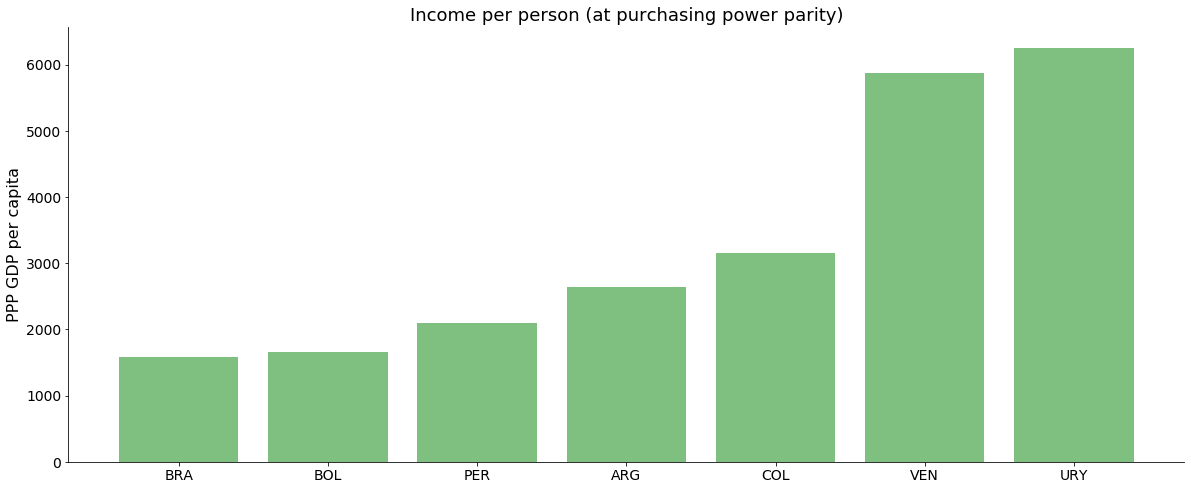

In [12]:
temp = plot_data[plot_data['countrycode'].isin(sa)]
temp = temp.loc[1950,:]
temp = temp.sort_values('gdp_cap')

fig, ax = plt.subplots(figsize=(20,8))

ax.bar(temp.countrycode, temp.gdp_cap, color='green', alpha=0.5)      # bar(x labels, )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('PPP GDP per capita', fontsize = 16)
ax.set_title('Income per person (at purchasing power parity)', fontsize=18)

# Set the tick label size
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

2. Create a scatter plot with GDP per capita on the y axis and consumption share on the x axis. This plot should include every country in your data set
   1. Set the marker color to blue and size to 20 for all countries that are not in the list of South American countries
   2. Set the marker color to green and size to 80 for the countries in the list of South American countries
   3. Label the South American markers with  name in 'countrycode'. Choose an appropriate size for the labels so that they are easy to read. 
   4. Resize all the axis labels as in part 1
  

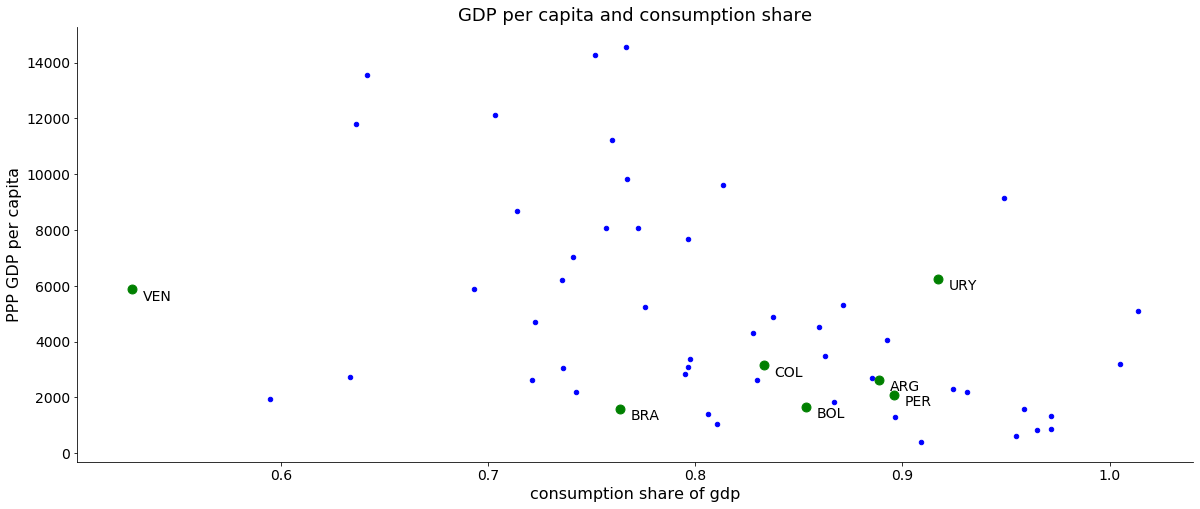

In [13]:
temp = plot_data.loc[1950,:]
temp2 = temp[temp['countrycode'].isin(sa)]

fig, ax = plt.subplots(figsize=(20,8))

ax.scatter(temp.con_share, temp.gdp_cap, color='blue', s=20)
ax.scatter(temp2.con_share, temp2.gdp_cap, color='green', s=80)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('PPP GDP per capita', fontsize = 16)
ax.set_xlabel('consumption share of gdp', fontsize = 16)
ax.set_title('GDP per capita and consumption share', fontsize = 18)

# Set the tick label size
ax.tick_params(axis='both', which='major', labelsize=14)

for x,y,label in zip(temp2['con_share'], temp2['gdp_cap'], temp2['countrycode']):
    ax.text(x+0.005, y-400,label, fontsize=14)
plt.savefig('plot.png')
plt.show()